In [47]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'serif'

import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

In [81]:
key_events = [
    ("3/1/2021", "March 21 \n Students became eligible for vaccination"),
    ("6/15/2021", "6/15/21 \n CDC declared Delta as 'variant of concern'"),
    ("6/28/2021", "6/28/21 \n Cornell required completing primary-series vaccination by 8/16/21"), 
    ("8/26/2021", "8/26/21 \n Fall 2021 instruction started"),
#     ("12/1/2021", "12/1/21: First Omicron case identified in the US"),
    ("12/2/2021", "12/2-12/8/21 \n Omicron outbreak at\n Cornell's Ithaca campus"),
    ("12/7/2021", "12/7/21 \n Fall 2021 instruction ended"),
    ("12/21/2021", "12/21/21 \n Cornell required completing booster vaccination by 1/31/22"),
    ("1/24/2022", "1/24/22 \n Spring 2022 instruction started online"),
    ("2/7/2022", "2/7/22 \n In-person instruction resumed,\n regular surveillance testing required"),
    ("2/21/2022", "2/21/22 \n Surveillance testing\n became optional")
]

In [82]:
df = pd.DataFrame(key_events, columns = ["date", "event"])
df['date'] = pd.to_datetime(df['date'])


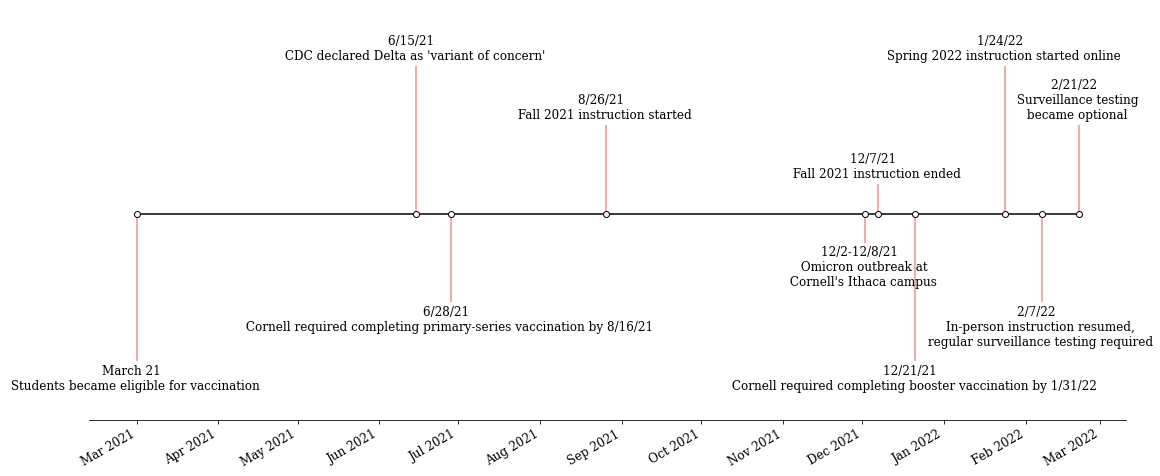

In [84]:

levels = np.tile(
    [-5, 5, -3, 3, -1, 1],
    int(np.ceil(len(df)/6))
)[:len(df)]

fig, ax = plt.subplots(figsize=(16, 6.5), constrained_layout=True);
# ax.set(title="Timeline")

ax.vlines(df['date'], 0, levels, color="tab:red", alpha = 0.5);  # The vertical stems.
ax.plot(   # Baseline and markers on it.
    df['date'],
    [0]*len(df),
    "-o",
    color="k",
    markerfacecolor="w"
);

# annotate lines
for d, l, r in zip(df['date'], levels, df['event']):
    ax.annotate(
        r,
        xy=(d, l),
        xytext=(-3, np.sign(l)*3),
        textcoords="offset points",
        horizontalalignment="center",
        verticalalignment="bottom" if l > 0 else "top",
        fontsize=12
    );

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1));
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"));
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", fontsize=12);

# remove y axis and spines
ax.yaxis.set_visible(False);
ax.yaxis.set_visible(False);
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)    
ax.margins(y=0.2);
# plt.show();

fig.savefig("../plots/timeline.pdf")